# NN 다중 분류
- 펭귄 데이터 셋

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.4 MB/s eta 0:00:00
time: 5.71 ms (started: 2024-06-28 06:20:47 +00:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf # colab에 설치가 되어 있음
import keras

time: 12.7 s (started: 2024-06-28 06:20:47 +00:00)


## 1. 데이터 준비

In [3]:
# window 베이스에서는 wget이 없음
# 해당 라이브러리 다운로드 or 프로그램 상으로 파일 받기
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv

--2024-06-28 06:20:59--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13523 (13K) [text/plain]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]  13.21K  --.-KB/s    in 0s      

2024-06-28 06:20:59 (56.8 MB/s) - ‘penguins.csv’ saved [13523/13523]

time: 127 ms (started: 2024-06-28 06:20:59 +00:00)


In [4]:
penguins = pd.read_csv('penguins.csv')
penguins.shape

(344, 7)

time: 45.2 ms (started: 2024-06-28 06:20:59 +00:00)


In [5]:
# 3종류 펭귄 데이터가 존재, 무게, 길이 등으로 분류함
# Species - Adelie, Chinstrap, Gentoo
df = penguins.copy()
df.head()

,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 151 ms (started: 2024-06-28 06:21:00 +00:00)


In [6]:
# 컬럼 처리
df.columns = [col.lower().replace(' ', '_').replace('(', '_').replace(')', '') for col in df.columns]
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 203 ms (started: 2024-06-28 06:21:00 +00:00)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
time: 50.3 ms (started: 2024-06-28 06:21:00 +00:00)


In [8]:
# object -> 숫자로 변경
# 결측치
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 15.7 ms (started: 2024-06-28 06:21:00 +00:00)


In [9]:
# 이상치 확인 - 없는듯
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


time: 415 ms (started: 2024-06-28 06:21:00 +00:00)


### 범주형 변수

In [10]:
# 범주형 데이터 뽑기
cols_cat = df.select_dtypes(include='object')
cols_cat

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


time: 115 ms (started: 2024-06-28 06:21:01 +00:00)


In [11]:
# 타겟 값
cols_cat['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

time: 33.9 ms (started: 2024-06-28 06:21:01 +00:00)


In [12]:
cols_cat['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

time: 20.2 ms (started: 2024-06-28 06:21:01 +00:00)


In [13]:
# 성별인데 .이 있음 -> 이상치가 존재함 -> 처리
cols_cat['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

time: 24.9 ms (started: 2024-06-28 06:21:01 +00:00)


In [14]:
# 성별에 .이 들어있는 이상치에 FEMALE을 넣기
# cols_cat에서 바꾸면 원본도 바뀜
# cols_cat.loc[cols_cat['sex']==',', 'sex'] = 'FEMALE'
cols_cat['sex'] = cols_cat['sex'].str.replace('.', 'FEMALE')
#cols_cat['sex'].value_counts()
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

time: 34.5 ms (started: 2024-06-28 06:21:01 +00:00)


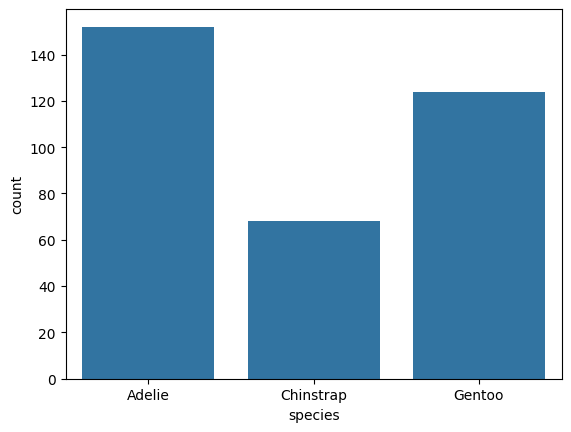

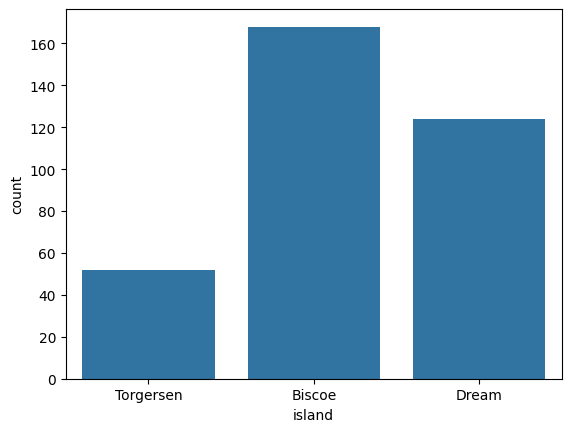

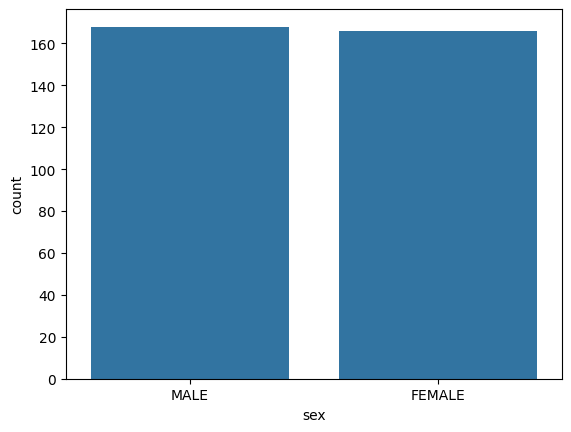

time: 4.99 s (started: 2024-06-28 06:21:01 +00:00)


In [15]:
# object에 해당하는 그래프 그리기
for col in cols_cat.columns:
    sns.countplot(data=cols_cat, x=col)
    plt.show()

In [16]:
# group by 이용
df.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

time: 23.2 ms (started: 2024-06-28 06:21:06 +00:00)


### 연속형 변수

In [17]:
cols_num = df.select_dtypes(include='number')
cols_num

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


time: 93.7 ms (started: 2024-06-28 06:21:06 +00:00)


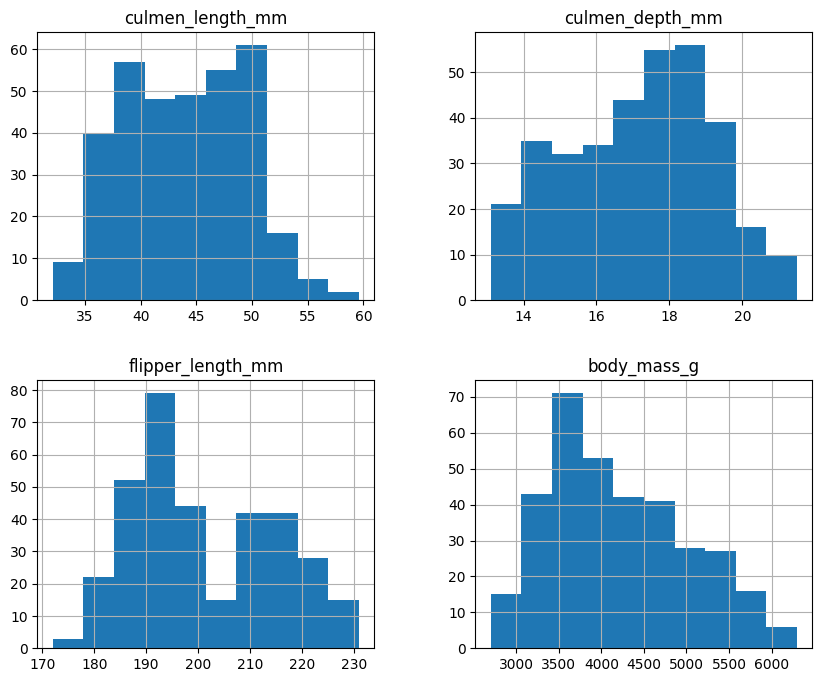

time: 1.85 s (started: 2024-06-28 06:21:06 +00:00)


In [18]:
# 히스토그램 - 한쪽으로 쏠려있는지 이상치, 결측치 보기
cols_num.hist(figsize=(10, 8))
plt.show()

#### 이상치

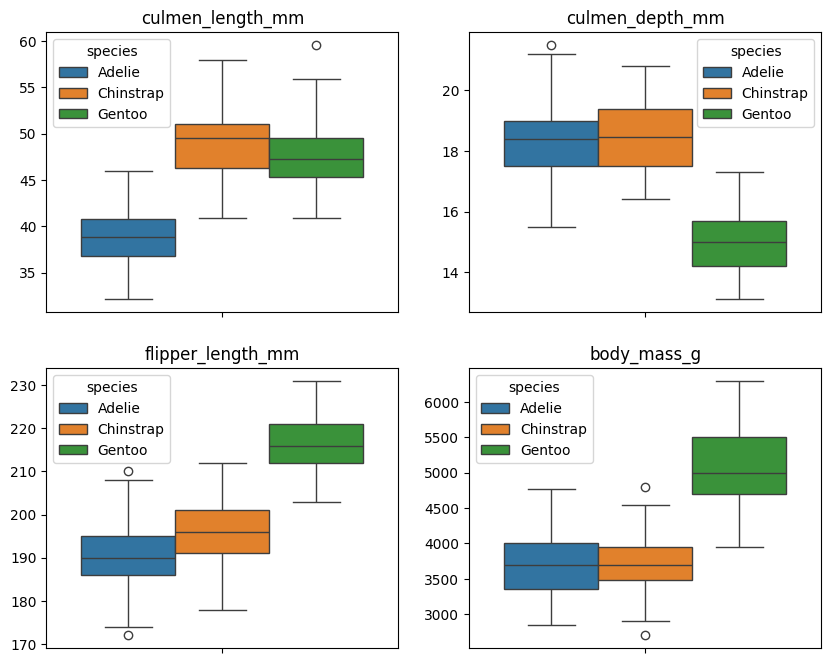

time: 2.58 s (started: 2024-06-28 06:21:08 +00:00)


In [19]:
# 박스 플롯 - 이상치가 거의 없음(처리 X)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, col in enumerate(cols_num.columns): # i번째를 뽑기 위해서
    sns.boxplot(y=col, data=cols_num, ax=axes[i], hue=df['species'])
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(col)
plt.show()

In [21]:
# 데이터 분리, 결측치 처리, 인코딩, 학습 진행

time: 435 µs (started: 2024-06-28 06:21:35 +00:00)


## 2. train, test 데이터 분리

In [23]:
# train_test_split 함수 사용
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['species'])
train.shape, test.shape

((275, 7), (69, 7))

time: 8.13 ms (started: 2024-06-28 06:21:39 +00:00)


### 결측치 처리

In [24]:
# 결측치 확인
cols_num.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

time: 9.18 ms (started: 2024-06-28 06:21:41 +00:00)


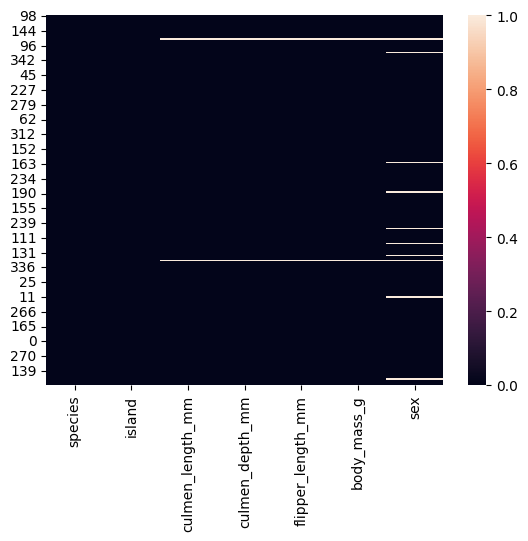

time: 666 ms (started: 2024-06-28 06:21:42 +00:00)


In [25]:
sns.heatmap(train.isna()) # 결측치가 존재 -> 날려버림
plt.show()

In [26]:
# 결측치는 날려버리기
train = train.dropna()
train.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

time: 11.1 ms (started: 2024-06-28 06:21:44 +00:00)


### X, y 분리

In [27]:
X_train = train.drop('species', axis=1)
y_train = train['species']
X_train.shape, y_train.shape

((265, 6), (265,))

time: 5.35 ms (started: 2024-06-28 06:21:46 +00:00)


In [28]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,Dream,33.1,16.1,178.0,2900.0,FEMALE
114,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
118,Torgersen,35.7,17.0,189.0,3350.0,FEMALE
303,Biscoe,50.0,15.9,224.0,5350.0,MALE
343,Biscoe,49.9,16.1,213.0,5400.0,MALE


time: 25.2 ms (started: 2024-06-28 06:21:48 +00:00)


In [29]:
# OrdinalEncoder(인코딩 해서 그대로 다시 넣기) - 숫자로 인코딩(0,1,2...)
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X_train[['island', 'sex']] = oe.fit_transform(X_train[['island', 'sex']])
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,1.0,33.1,16.1,178.0,2900.0,1.0
114,0.0,39.6,20.7,191.0,3900.0,1.0
118,2.0,35.7,17.0,189.0,3350.0,1.0
303,0.0,50.0,15.9,224.0,5350.0,2.0
343,0.0,49.9,16.1,213.0,5400.0,2.0


time: 26.5 ms (started: 2024-06-28 06:21:51 +00:00)


In [30]:
# y는 label encoding을 사용
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_e = le.fit_transform(y_train) # fit + transform
y_train_e

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

time: 5.78 ms (started: 2024-06-28 06:21:53 +00:00)


### 스케일링

In [31]:
# robust scaler 사용
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_train_s

array([[ 0.        , -1.31868132, -0.375     , -0.82608696, -0.92      ,
        -1.        ],
       [-1.        , -0.6043956 ,  1.0625    , -0.26086957, -0.12      ,
        -1.        ],
       [ 1.        , -1.03296703, -0.09375   , -0.34782609, -0.56      ,
        -1.        ],
       ...,
       [ 1.        , -0.25274725,  0.375     , -0.08695652,  0.16      ,
         0.        ],
       [ 1.        , -0.92307692,  0.46875   , -0.43478261, -0.2       ,
        -1.        ],
       [ 0.        ,  0.62637363,  0.53125   ,  0.56521739,  0.04      ,
         0.        ]])

time: 23.8 ms (started: 2024-06-28 06:21:55 +00:00)


## 3. 모델 학습

In [62]:
# softmax가 들어가면, 출력값의 개수와 가지고 있는 정답값의 개수가 같아야함
# 따라서 one-hot encoding이 되어야 함
from keras.utils import to_categorical
y_train_o = to_categorical(y_train_e)
y_train_o

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0

time: 12.9 ms (started: 2024-06-28 06:47:52 +00:00)


In [63]:
# y_train_o가 3으로 나옴
print(X_train_s.shape, y_train_o.shape)
print(type(X_train_s), type(y_train_o))

(265, 6) (265, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 1.15 ms (started: 2024-06-28 06:47:56 +00:00)


In [64]:
X_train_s.shape

(265, 6)

time: 4.25 ms (started: 2024-06-28 06:47:57 +00:00)


In [65]:
## Neural Network 사용
from keras import layers

model = keras.Sequential([
    # 보통 2의 배수로 함
    layers.Dense(units=16, activation='relu', input_shape=(6, )),
    layers.Dense(units=8, activation='relu'),
    # 다중 분류이므로 출력은 분류되는 것만큼 - activation을 softmax 사용
    layers.Dense(units=3, activation='softmax')
])

time: 57.6 ms (started: 2024-06-28 06:47:58 +00:00)


In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                112       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 275 (1.07 KB)
Trainable params: 275 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 46.5 ms (started: 2024-06-28 06:48:00 +00:00)


In [67]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

time: 15.5 ms (started: 2024-06-28 06:48:01 +00:00)


In [68]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(
          X_train_s, y_train_o,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2
          )

Epoch 1/100
14/14 [==============================] - 1s 20ms/step - loss: 1.0402 - accuracy: 0.3632 - val_loss: 0.9562 - val_accuracy: 0.3774
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.9174 - accuracy: 0.4057 - val_loss: 0.8658 - val_accuracy: 0.5283
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.8195 - accuracy: 0.4481 - val_loss: 0.7888 - val_accuracy: 0.5660
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7417 - accuracy: 0.5189 - val_loss: 0.7204 - val_accuracy: 0.6415
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6726 - accuracy: 0.6321 - val_loss: 0.6640 - val_accuracy: 0.6604
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6162 - accuracy: 0.7830 - val_loss: 0.6143 - val_accuracy: 0.7358
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5677 - accuracy: 0.8491 - val_loss: 0.5689 - val_accuracy: 0.7547
Epoch 8/100


In [69]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 1.03 ms (started: 2024-06-28 06:48:24 +00:00)


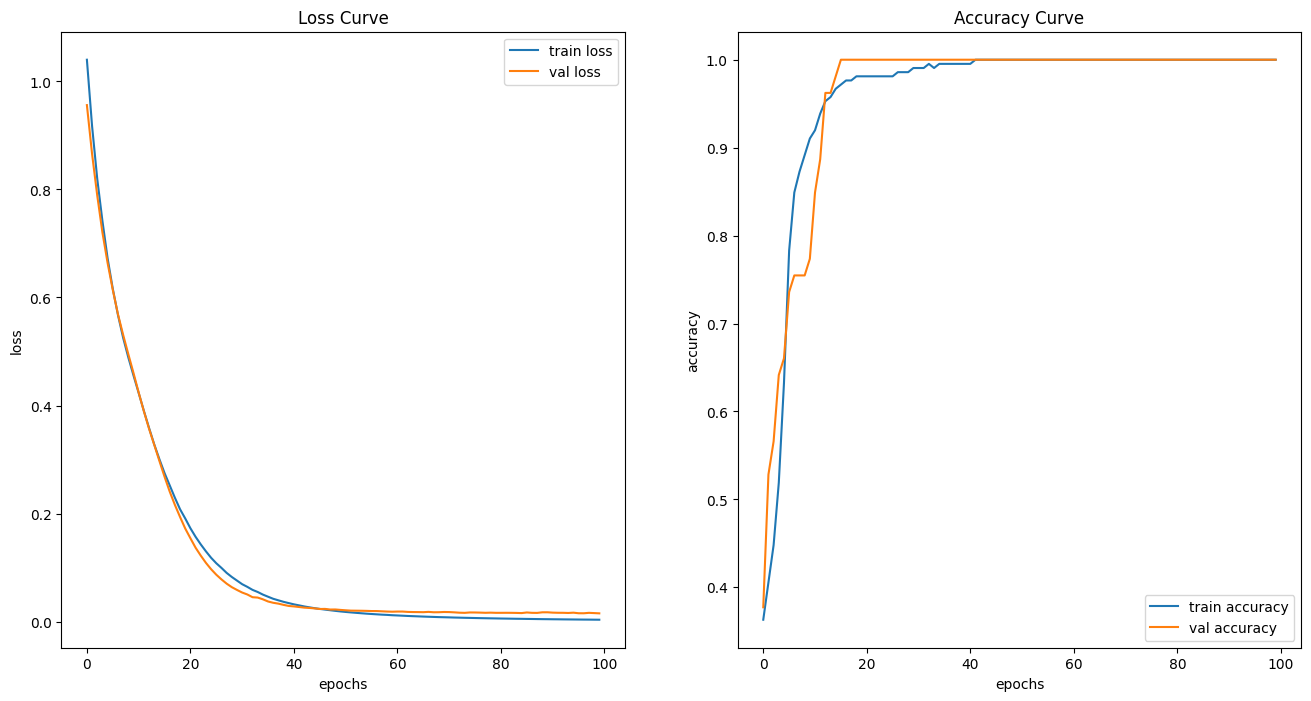

time: 652 ms (started: 2024-06-28 06:48:24 +00:00)


In [70]:
plot_history(history)

## 테스트 데이터

In [71]:
# test 데이터 전처리 - 결측치, oe, le, rs를 진행함
X_test = test.drop('species', axis = 1)
y_test = test['species']

time: 3.16 ms (started: 2024-06-28 06:49:40 +00:00)


In [ ]:
X_test.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
151,Dream,41.5,18.5,201.0,4000.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
294,Biscoe,46.4,15.0,216.0,4700.0,FEMALE
337,Biscoe,48.8,16.2,222.0,6000.0,MALE
158,Dream,46.1,18.2,178.0,3250.0,FEMALE


In [72]:
# OrdinalEncoder 인코딩 진행
X_test[['island', 'sex']] = oe.transform(X_test[['island', 'sex']])
X_test.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
151,1.0,41.5,18.5,201.0,4000.0,2.0
1,2.0,39.5,17.4,186.0,3800.0,1.0
294,0.0,46.4,15.0,216.0,4700.0,1.0
337,0.0,48.8,16.2,222.0,6000.0,2.0
158,1.0,46.1,18.2,178.0,3250.0,1.0


time: 30 ms (started: 2024-06-28 06:49:47 +00:00)


In [73]:
# y는 label encoding
y_test_e = le.transform(y_test)
y_test_e

array([0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 2])

time: 4.75 ms (started: 2024-06-28 06:49:49 +00:00)


In [74]:
# 스케일링
X_test_s = rs.transform(X_test)
X_test_s

array([[ 0.        , -0.3956044 ,  0.375     ,  0.17391304, -0.04      ,
         0.        ],
       [ 1.        , -0.61538462,  0.03125   , -0.47826087, -0.2       ,
        -1.        ],
       [-1.        ,  0.14285714, -0.71875   ,  0.82608696,  0.52      ,
        -1.        ],
       [-1.        ,  0.40659341, -0.34375   ,  1.08695652,  1.56      ,
         0.        ],
       [ 0.        ,  0.10989011,  0.28125   , -0.82608696, -0.64      ,
        -1.        ],
       [-1.        , -0.81318681, -0.40625   , -0.60869565, -0.78      ,
        -1.        ],
       [ 0.        ,  0.48351648,  0.53125   ,  0.13043478, -0.2       ,
         0.        ],
       [-1.        ,  0.62637363,  0.        ,  1.34782609,  1.24      ,
         0.        ],
       [ 0.        ,  0.14285714,  0.15625   , -0.26086957, -0.28      ,
        -1.        ],
       [ 0.        ,  0.37362637,  0.0625    , -0.26086957, -0.52      ,
         0.        ],
       [ 1.        , -1.15384615,  1.1875    ,  0.

time: 18.1 ms (started: 2024-06-28 06:49:51 +00:00)


In [76]:
X_test_s.shape, y_test_e.shape

((69, 6), (69,))

time: 5.8 ms (started: 2024-06-28 06:50:40 +00:00)


## 예측

In [86]:
y_pred = model.predict(X_test_s)
y_pred

3/3 [==============================] - 0s 9ms/step


array([[9.96775687e-01, 7.46972742e-04, 2.47743260e-03],
       [9.98291969e-01, 1.09061133e-03, 6.17565005e-04],
       [5.35634208e-05, 4.02059493e-04, 9.99544322e-01],
       [2.97346414e-04, 4.94320811e-05, 9.99653220e-01],
       [5.97812410e-04, 9.98980999e-01, 4.21221281e-04],
       [9.98849928e-01, 2.43782648e-04, 9.06416099e-04],
       [2.63882289e-03, 9.92047548e-01, 5.31374058e-03],
       [2.71446304e-04, 4.12115798e-04, 9.99316394e-01],
       [1.69732637e-04, 9.98847425e-01, 9.82989906e-04],
       [4.95704543e-03, 9.89595950e-01, 5.44693926e-03],
       [9.99986708e-01, 1.03024786e-06, 1.21098528e-05],
       [1.54921785e-04, 3.62465362e-05, 9.99808788e-01],
       [2.35604192e-03, 9.94399488e-01, 3.24445986e-03],
       [3.37720674e-04, 5.15935826e-04, 9.99146283e-01],
       [9.99337499e-05, 7.20631389e-04, 9.99179423e-01],
       [2.94840065e-05, 8.69008873e-05, 9.99883592e-01],
       [9.92713928e-01, 1.11719407e-03, 6.16891962e-03],
       [9.99804020e-01, 1.03859

time: 173 ms (started: 2024-06-28 06:55:18 +00:00)


In [87]:
# 가장 큰 값이 들어있는 인덱스 값을 알려줌
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 2])

time: 5.61 ms (started: 2024-06-28 06:55:21 +00:00)


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
def print_metrics(y_true, y_pred, aver='macro'):
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("recall_score:", recall_score(y_true, y_pred, average = aver))
    print("precision_score:", precision_score(y_true, y_pred, average = aver))
    print("f1_score:", f1_score(y_true, y_pred, average = aver))
    # 그림 그리기
    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt = 'd', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

time: 1.19 ms (started: 2024-06-28 06:56:00 +00:00)


accuracy: 0.9855072463768116
recall_score: 0.9888888888888889
precision_score: 0.9777777777777779
f1_score: 0.9828560296123126


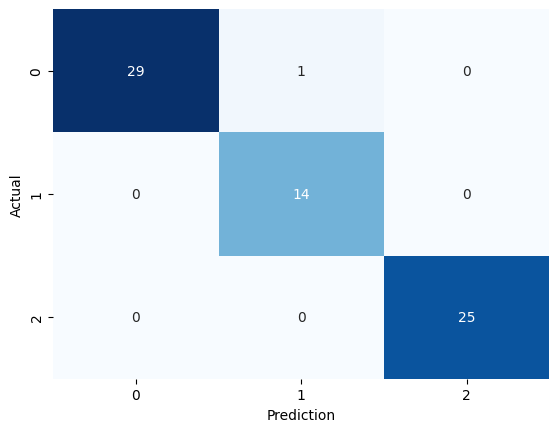

time: 535 ms (started: 2024-06-28 07:17:09 +00:00)


In [93]:
print_metrics(y_test_e, y_pred, aver='macro')